#### Install physioprep

In [1]:
!pip install physioprep

#### Import physioprep and create an instance of M3WaveFormMasterClass

In [2]:
import physioprep
import matplotlib.pyplot as plt
physioprep.__version__
module = physioprep.M3WaveFormMasterClass()

#### 1. get_patients

In [3]:
patients_list = module.get_patients(load_preset = True)
print(patients_list[:5])

['p04/p044206/', 'p00/p001521/', 'p02/p021968/', 'p05/p054969/', 'p08/p082001/']


#### 2. get_patient_group_id

In [4]:
group, pid = module.get_patient_group_id(patient_group_id = "p00/p000020/")
print(group, pid)

p00 p000020


#### 3. get_available_signals

In [5]:
available_signals = module.get_available_signals()
print(available_signals[:10])

['II', 'AVF', 'ABP', 'PAP', 'V', 'MCL1', 'AVR', 'RESP', 'PLETH', 'III']


#### 4. get_patient_with_signal

In [6]:
df = module.get_patient_with_signal(signal_filter = ['II', 'PLETH', 'ABP'])
df.head(3)

,patient_group,patient_id,patient_record,patient_signals
10,p00,p000107,p000107-2122-05-14-21-01,"[II, V, PLETH, ABP, I]"
41,p00,p000160,p000160-2174-11-06-10-12,"[II, III, AVR, V, RESP, PLETH, ABP]"
43,p00,p000188,p000188-2161-12-09-17-50,"[II, III, V, RESP, PLETH, ABP]"


#### 5. get_patient_record

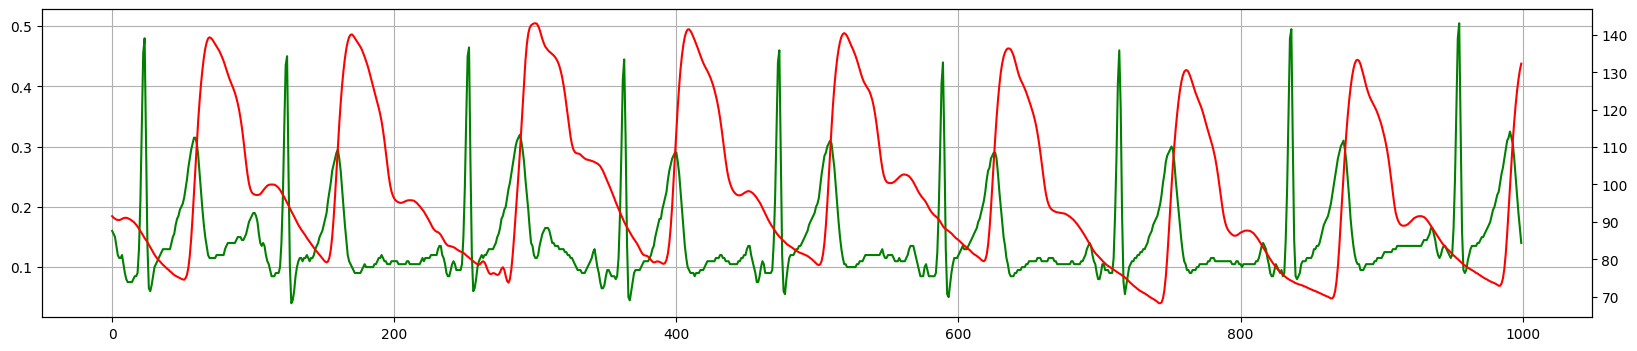

In [7]:
group, pid, record = "p00", "p000188", "p000188-2161-12-09-17-50"
rec = module.get_patient_record(group, pid, record, sampfrom = 30000, sampto = 31000, channels = ['II', 'PLETH', 'ABP'])
plt.figure(figsize = (20, 4))
plt.grid(True)
plt.plot(rec.p_signal[:, 0], c = 'g')
plt.twinx()
plt.plot(rec.p_signal[:, 2], c = 'r')

#### 

#### 6. get_patient_header

In [8]:
header = module.get_patient_header(group, pid, record)
header.sig_len, header.fs

(10093000, 125)

#### 7. get_subject_split

In [9]:
tr, va, te = module.get_subject_split(df, frac1 = 0.8, frac2 = 0.1, frac3 = 0.1, seed = 42, channels = ['II', 'PLETH', 'ABP'])
print(f"tr len: {len(tr)}, va len: {len(va)}, te len {len(te)}")

tr len: 4784, va len: 598, te len 598


#### 8. get_data_batch

In [10]:
batch = module.get_data_batch(tr, batch_size = 4, signal_len = 250, channels = ['II', 'PLETH', 'ABP'], timeout = 100)
print(batch.shape)

(4, 3, 250)
